<a href="https://colab.research.google.com/github/merazAfridi/HeartFailurePrediction_NB/blob/main/HeartFailure_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart_failure_clinical_records_dataset.csv")

In [ ]:
#Data Showing
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
print("Shape of the array:", data.shape)

Shape of the array: (299, 13)


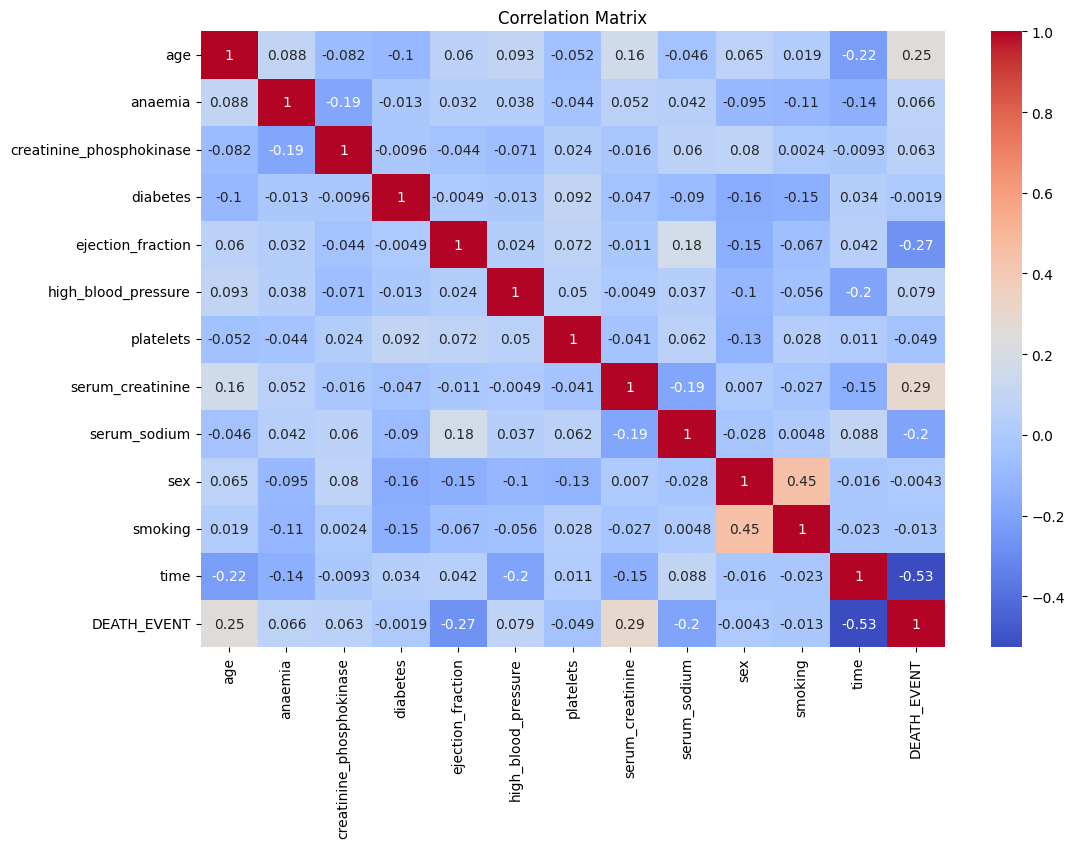

In [ ]:
# Step 4: Find Correlation and Visualize
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
#  Selecting Specific Columns / dropping sex, smoking cause high related
data = data[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
             'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
             'time', 'DEATH_EVENT']]

In [ ]:
print("Shape of the array:", data.shape)

Shape of the array: (299, 11)


<Axes: xlabel='DEATH_EVENT', ylabel='Count'>

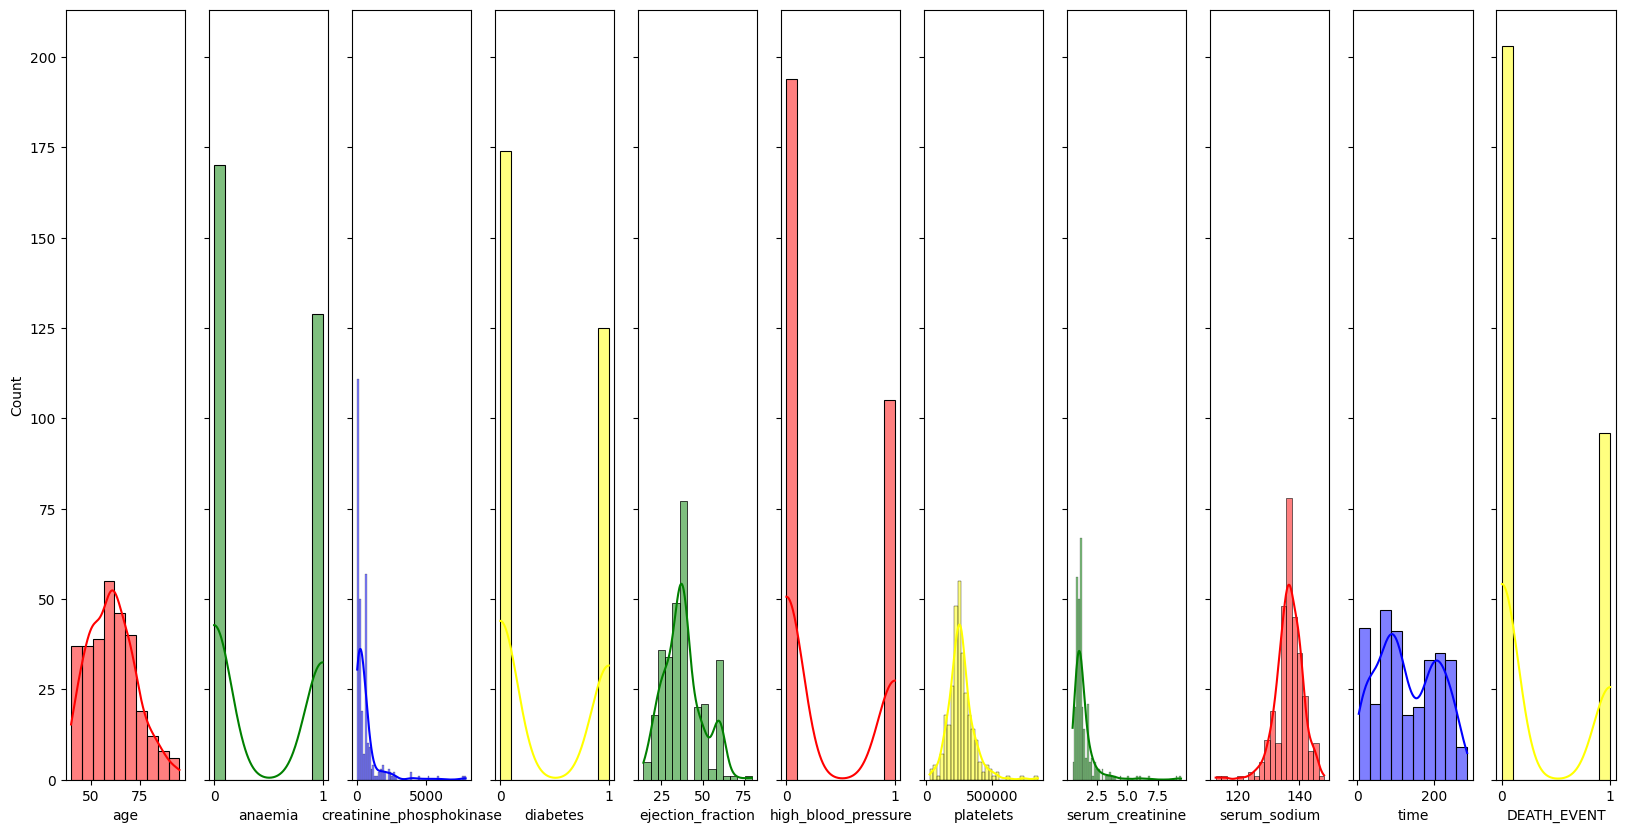

In [ ]:
fig , axs = plt.subplots(1, 11, figsize=(20, 10) , sharey=True)
sns.histplot(data, kde=True, ax=axs[0] ,color='red', x='age')
sns.histplot(data, kde=True, ax=axs[1], color='green', x='anaemia')
sns.histplot(data, kde=True, ax=axs[2], color='blue', x='creatinine_phosphokinase')
sns.histplot(data, kde=True, ax=axs[3], color='yellow', x='diabetes')
sns.histplot(data, kde=True, ax=axs[4], color='green', x='ejection_fraction')
sns.histplot(data, kde=True, ax=axs[5], color='red', x='high_blood_pressure')
sns.histplot(data, kde=True, ax=axs[6], color='yellow', x='platelets')
sns.histplot(data, kde=True, ax=axs[7], color='green', x='serum_creatinine')
sns.histplot(data, kde=True, ax=axs[8], color='red', x='serum_sodium')
sns.histplot(data, kde=True, ax=axs[9], color='blue', x='time')
sns.histplot(data, kde=True, ax=axs[10], color='yellow', x='DEATH_EVENT')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# SSplit Test Train
X = data.drop(columns=['DEATH_EVENT'])
y = data['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Apply Optimal Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Find Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


Accuracy: 0.7333333333333333


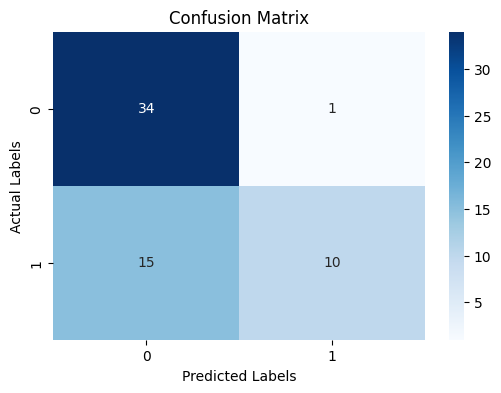

In [ ]:
# Confusion Matrix
c_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Find the optimal parameters for Gaussian Naive Bayes
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
}

# Create the grid search object
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'var_smoothing': 1e-08}
Best score: 0.8327127659574469


In [ ]:
#Fit with this best param
model2 = GaussianNB(var_smoothing=1e-08)
model2.fit(X_train, y_train)

GaussianNB(var_smoothing=1e-08)


Accuracy: 0.7333333333333333


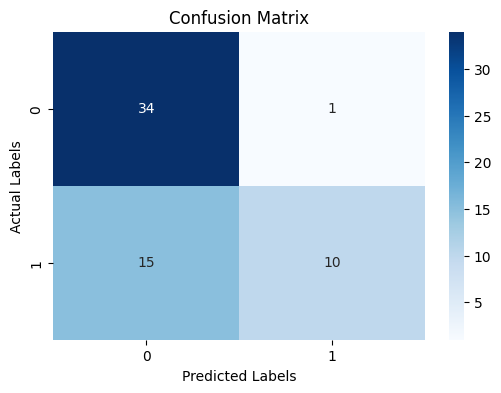

In [ ]:
# Find Accuracy 2nd time
y_pred = model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Confusion Matrix 2nd time
c_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

**Description:**

The code above applies the Naive Bayes algorithm to a dataset of heart failure patients. The code first performs data exploration and visualization, including calculating correlations and plotting histograms for each feature. Then, it splits the data into training and test sets and trains a Naive Bayes model on the training set.

The model's accuracy on the test set is then evaluated, and a confusion matrix is generated to visualize the model's performance. Finally, the code performs a grid search to find the optimal parameters for the Naive Bayes model and re-evaluates the model's performance with the optimal parameters.


**Advantages of Naive Bayes:**

* Simple and easy to implement.
* Efficient in terms of both training and prediction time.
* Performs well even with small datasets.
* Robust to noisy and irrelevant features.

**Disadvantages of Naive Bayes:**

* The assumption of conditional independence between features may not always hold in practice.
* Can be sensitive to the choice of prior probabilities.
* May not perform well with highly correlated features.